# <span style="color:#0000aa">Tropycal: A Python Package for Analyzing Tropical Cyclones and More</span>

<span style="color:green">Tomer Burg, Sam P. Lillo</span>

34th Conference on Hurricanes and Tropical Meteorology

# Note

This presentation uses code from Tropycal that is already included in v0.2.4 (the latest release on pip), as well as updated code that has not yet been released on pip due to unforeseen circumstances. We hope to have it released this weekend, and this script will be updated accordingly once version 0.2.5 is released.

## What is Tropycal?

- Tropycal is an open source Python package intended to simplify the process of obtaining and analyzing tropical cyclone data


- Tropical cyclone data can be retrieved globally, and quickly analyzed and plotted in a few simple lines of code


- Tropycal aims to provide tools for the operational and research communities for past and current tropical cyclones

## Why use Tropycal?

- Python has become a dominant programming language in Atmospheric Science in recent years


- Dedicated Python packages exist for standard meteorological calculations (e.g., MetPy), radar (e.g., Py-ART), etc.


- There is currently no dedicated and centralized package for tropical cyclone data and analyses

## Starting Your Code

- If you have little to no experience with Python, this section can be of use to you!


- When we start a Python script, we import the necessary package(s) that the script will use


- Tropycal works with Python 3.6 and higher, and uses Cartopy for plotting maps

In [1]:
#First, we import Tropycal and its key components: "tracks", "tornado", and "recon"
from tropycal import tracks, tornado, recon

#We then import "numpy" for mathematical calculations, and "datetime" for date and time functionality
import numpy as np
from datetime import datetime as dt,timedelta

#For the purposes of this talk, we'll be ignoring warnings from functions
import warnings
warnings.filterwarnings('ignore')

## Tropycal Data Structure

- Tropical cyclone data in Tropycal is organized into three primary structures:
     - <span style="color:blue;font-weight:bold">TrackDataset &#8594;</span> data from all tropical cyclones in this basin
     - <span style="color:blue;font-weight:bold">Season &#8594;</span> data from all storms in a single season
     - <span style="color:blue;font-weight:bold">Storm &#8594;</span> data from single storm


- Tropycal further contains tools for analyzing **tornadoes** and **reconaissance mission** data

## Reading in HURDATv2 Data

- To start off, we read in the HURDATv2 dataset containing North Atlantic tropical cyclones from 1851-present


- This data will be stored in a variable called "basin", containing the data and additional functions for data analysis
    - *"basin" is an instance of the object TrackDataset*


- We include a flag "include_btk=True" to read in the latest tropical cyclones not included in HURDATv2 yet

In [2]:
basin = tracks.TrackDataset('north_atlantic',include_btk=True)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.99 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (4.83 seconds)


# TrackDataset object

- Now that we've read in HURDATv2 data into the "basin" variable, we can begin our analyses!


- First, let's take a look at what is contained in basin:

In [3]:
print(basin)

<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             north_atlantic
    Source:            hurdat
    Number of storms:  1936
    Maximum wind:      165 knots (Allen 1980)
    Minimum pressure:  882 hPa (Wilma 2005)
    Year range:        1851 — 2021


# TrackDataset object

- Let's do a simple exercise - say we want to look at a time series of **Accumulated Cyclone Energy (ACE)** from 2020


- We also want to compare the ACE from 2020 to that from 2004, 2005 and 2017


- For that, we use the `ace_climo()` function:

In [4]:
basin.ace_climo(2020,compare_years=(2004,2005,2017))

ValueError: operands could not be broadcast together with shapes (8,) (12,) (8,) 

# TrackDataset object

- `filter_storms()` is a powerful function - one can filter storms by various thresholds


- For example, say we want to retrieve a list of all storms that intensified by >=90 kt over a 36 hour period:

In [5]:
#Add "doInterp=True" to interpolate storm data linearly to hourly
storms = basin.filter_storms(thresh={'dv_min':90,'dt_window':36},doInterp=True)

#Print the list of storm IDs:
print(storms)

['AL031935', 'AL041992', 'AL062007', 'AL252005', 'AL262020', 'AL292020']


# TrackDataset object

- Having a list of storm IDs that meet this criteria is great and all, but we want to know their names too!


- Luckily, the TrackDataset object has a `get_storm_tuple()` function

    - **Input:** storm ID as a string (e.g., "AL252005")
    - **Output:** Tuple containing storm name and year (e.g., "Wilma, 2005")

In [6]:
for name in storms:
    print(basin.get_storm_tuple(name))

('UNNAMED', 1935)
('ANDREW', 1992)
('FELIX', 2007)
('WILMA', 2005)
('DELTA', 2020)
('ETA', 2020)


# TrackDataset object

- Next, we want to make a plot of these storm tracks


- We want to omit plotting the 6-hour position dots, and coloring the lines by SSHWS category

In [ ]:
import cartopy.crs as ccrs     # this line was necessary but missing from notebook

<GeoAxesSubplot:title={'left':'TC Track Composite'}>

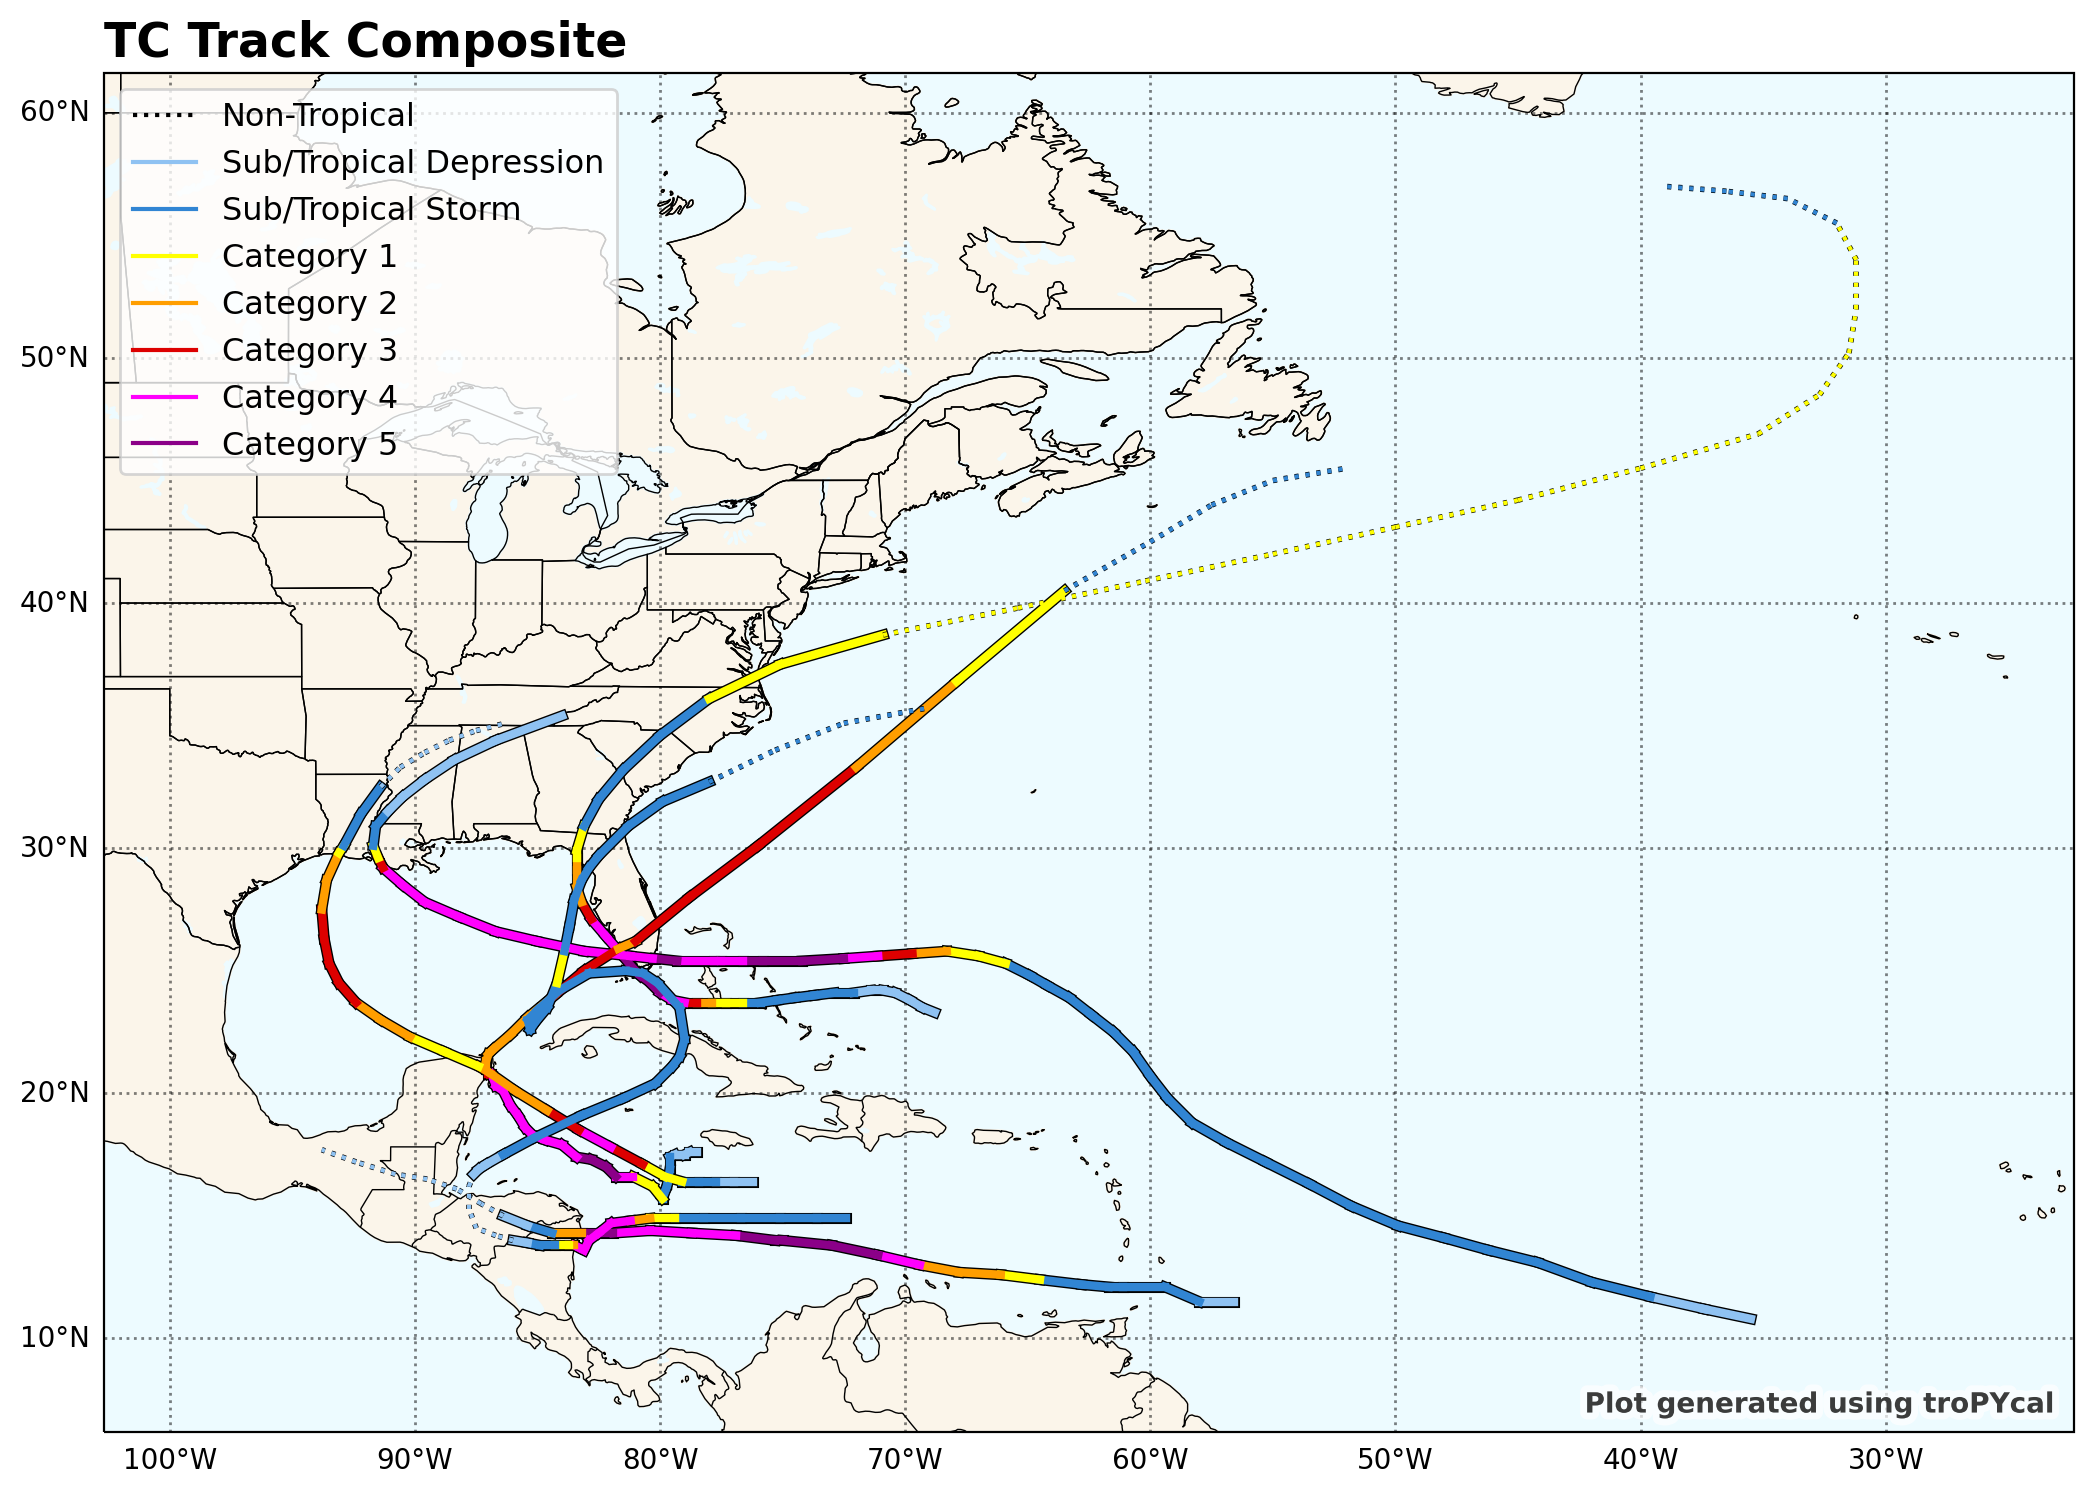

In [8]:
basin.plot_storms(storms,prop={'dots':False,'linecolor':'category','linewidth':3})

# TrackDataset object

- Another powerful tool via a TrackDataset object is `gridded_stats()`


- This function creates a lat/lon grid of multiple variables as specified by a user query


- For example, let's plot the HURDATv2 minimum pressure change over a 24-hour period, by 2.5 degree gridpoint:

Minimum pressure change in 24 hours
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
--> Generating plot


AttributeError: 'Bbox' object has no attribute 'inverse_transformed'

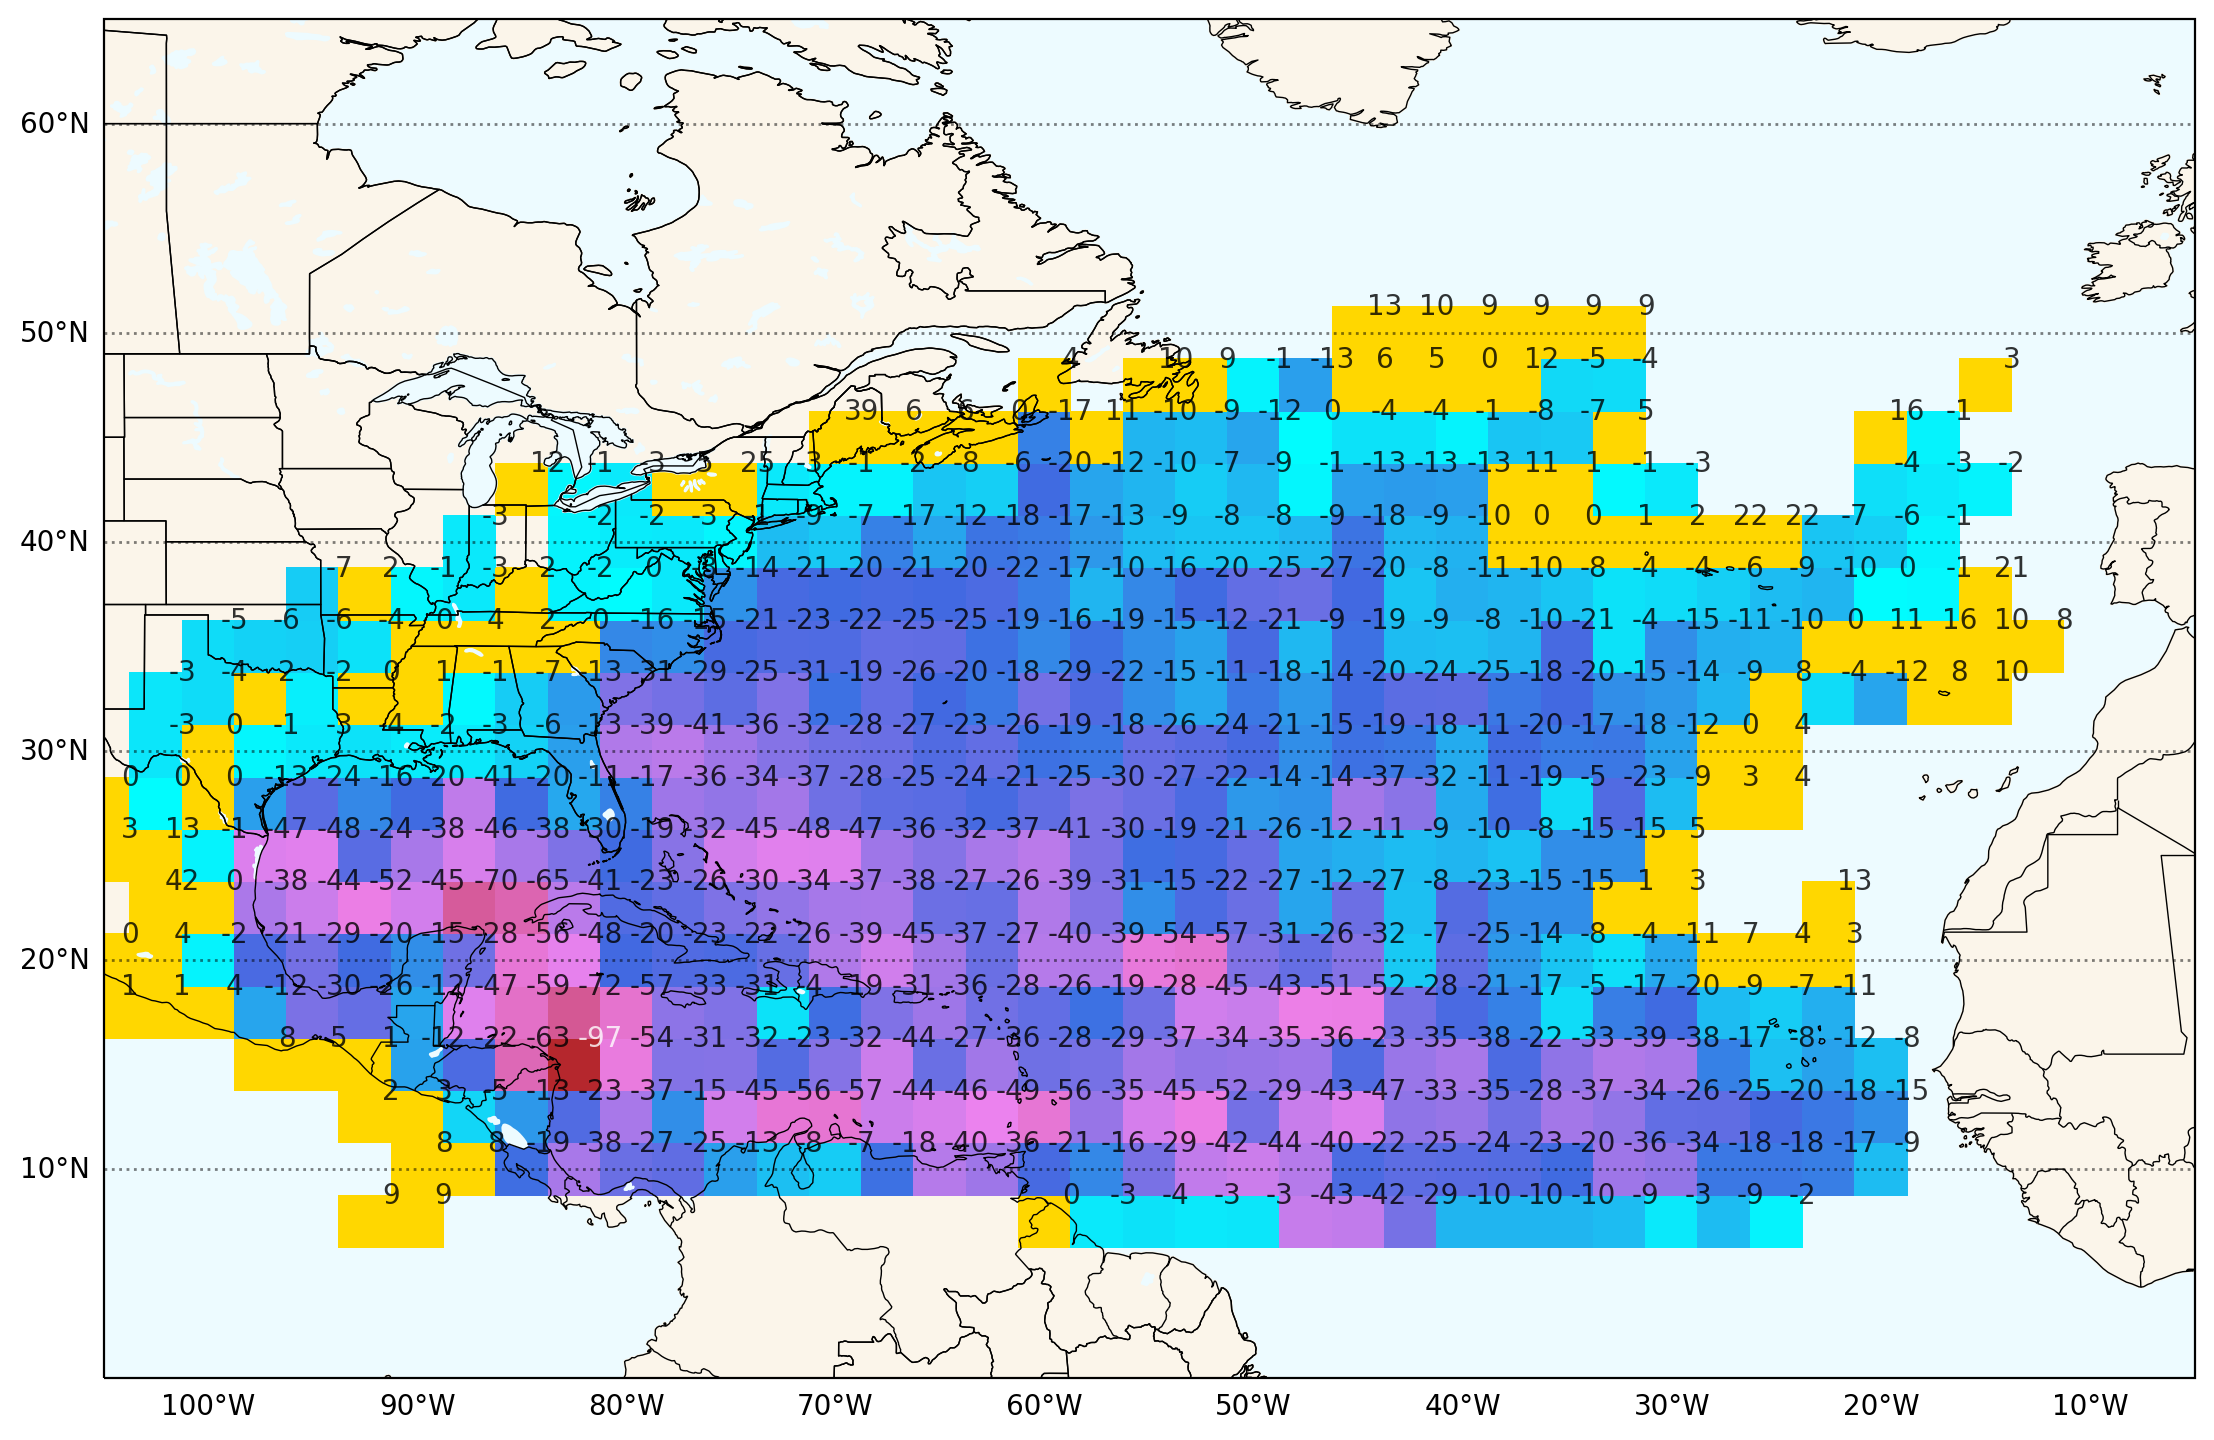

In [9]:
mycmap = {-100:'firebrick',-50:'violet',-20:'royalblue',-.001:'cyan',0:'gold',10:'gold'}
basin.gridded_stats('Minimum pressure change in 24 hours',binsize=2.5,year_range=(1851,2019),prop={'plot_values':True,'cmap':mycmap,'levels':(-100,10)})

# TrackDataset object

- But wait -- there's more!


- This presentation is North Atlantic centric, but Tropycal can read in HURDAT data from the East Pacific & IBTrACS data globally


- There are several methods of reading in IBTrACS data, whether JMA, JTWC, or JTWC_Neumann


- We can plot the 2020 ACE anomaly vs. the 1979-2019 climatology
    - <span style="color:gray">*Side note: If you want to retrieve the grid as a numpy array, add `return_array=True` in the arguments!*</span>

In [10]:
allbasins = tracks.TrackDataset('all',source='ibtracs',ibtracts_mode='jtwc')
mycmap = {-2:'mediumblue',-0.1:'skyblue',0:'0.8',.1:'lightsalmon',2:'firebrick'}
ax = allbasins.gridded_stats('ACE',year_range=(2020,2020),year_range_subtract=(1979,2019),year_average=True,binsize=2.5,\
                    prop={'cmap':mycmap,'smooth':1},return_ax=True)
ax.set_title('Accumulated Cyclone Energy \n 1$\sigma$ smoothed',loc='left',fontsize=17,fontweight='bold')

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (42.57 seconds)


TypeError: TrackDataset.gridded_stats() got an unexpected keyword argument 'return_ax'

ACE
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
-4.981353602077701
--> Generating plot


AttributeError: 'Bbox' object has no attribute 'inverse_transformed'

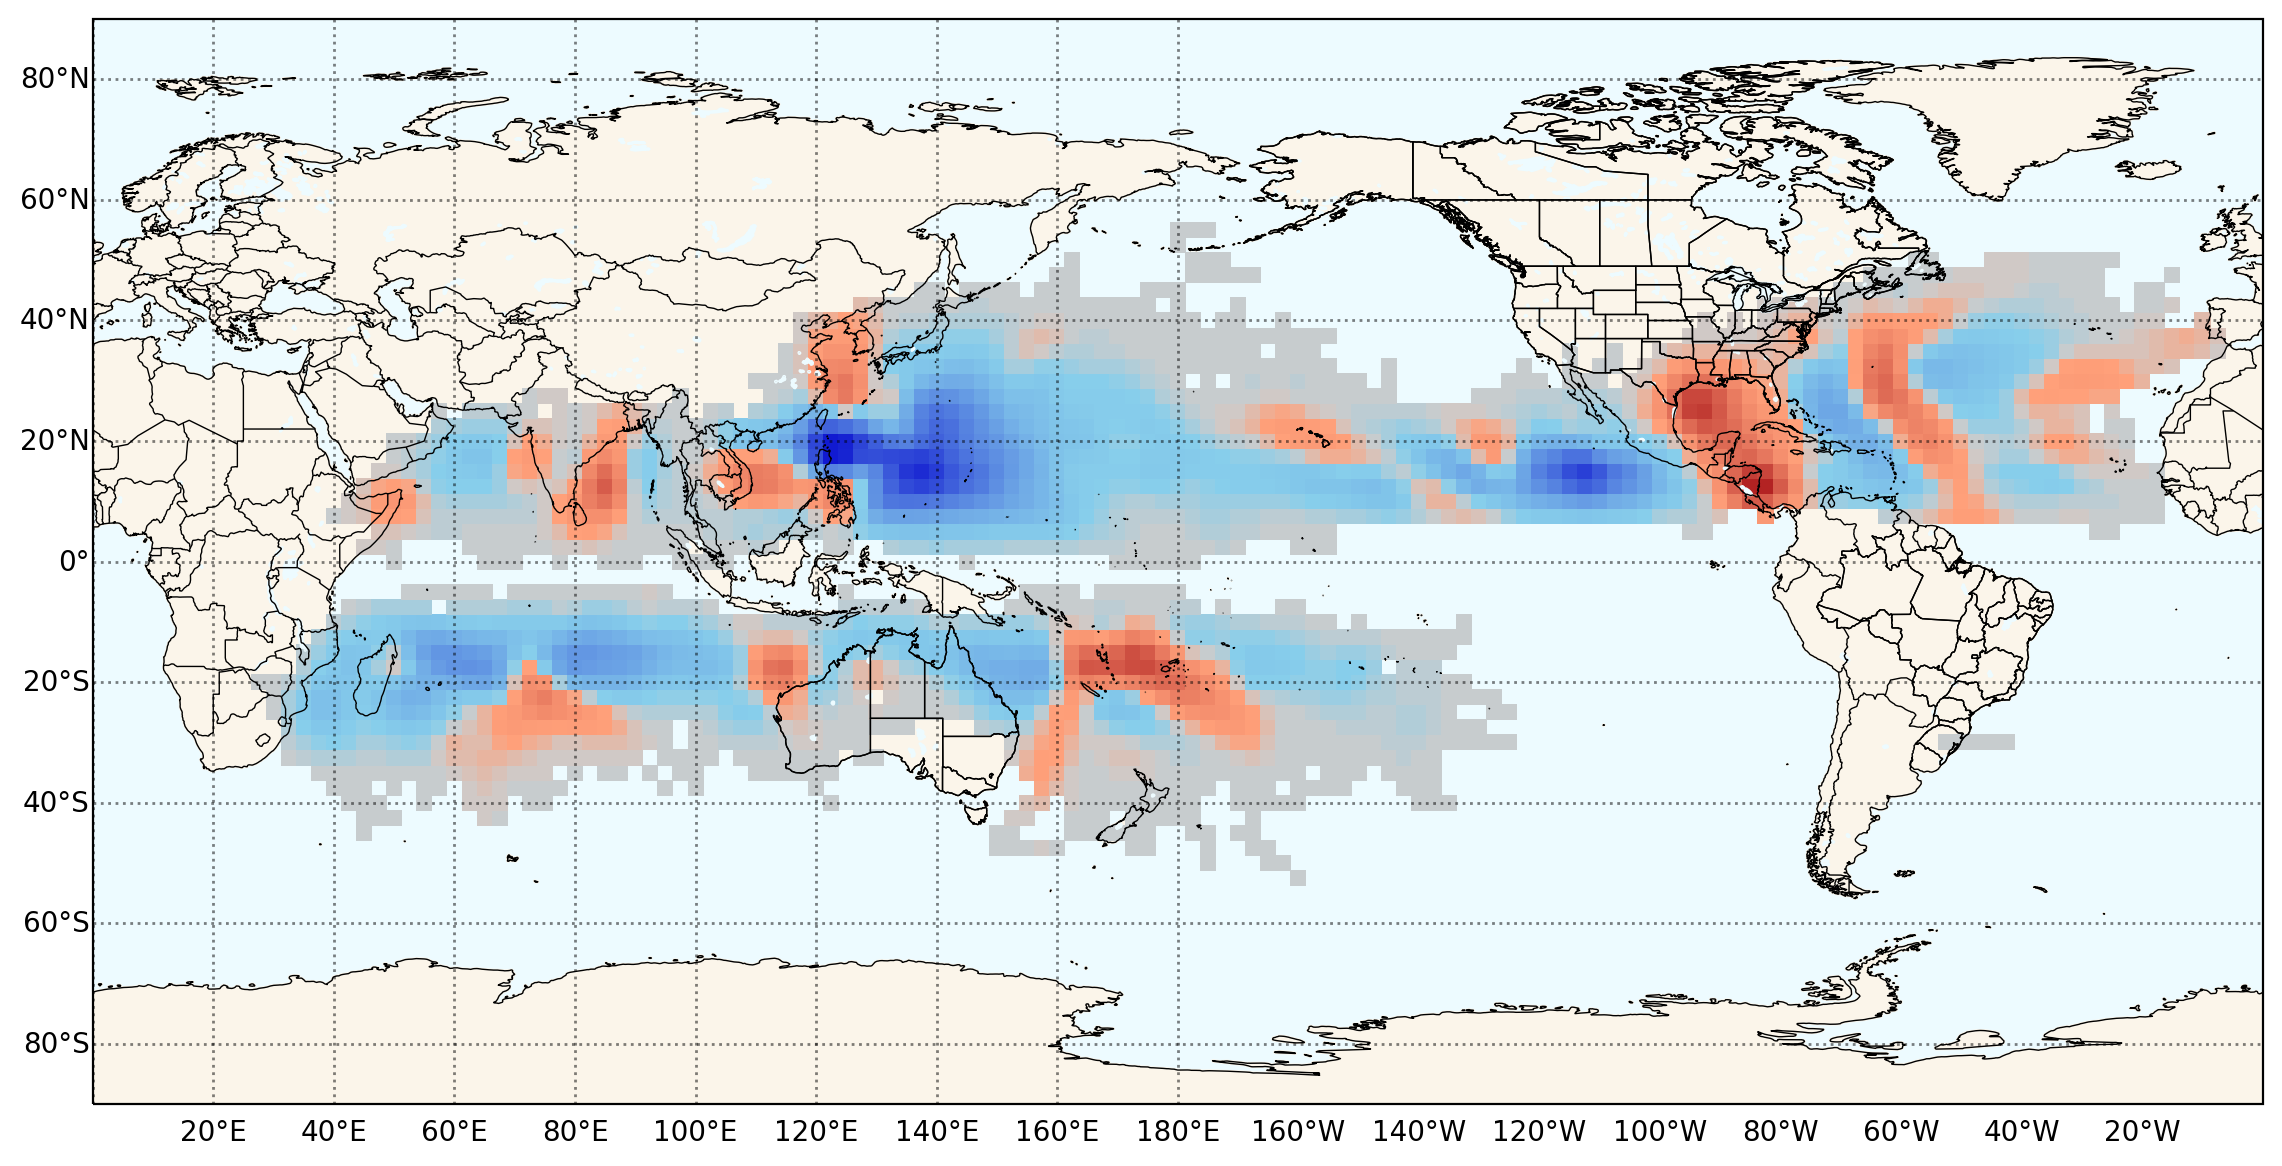

In [11]:
# excising return_ax keyword
ax = allbasins.gridded_stats('ACE',year_range=(2020,2020),year_range_subtract=(1979,2019),year_average=True,binsize=2.5,\
                    prop={'cmap':mycmap,'smooth':1})
ax.set_title('Accumulated Cyclone Energy \n 1$\sigma$ smoothed',loc='left',fontsize=17,fontweight='bold')

# Season object

- We've looked at the full dataset object, but what if we only want to focus on a single season?


- The 2020 Atlantic hurricane season was exceptionally active -- let's take a look!

In [12]:
#Retrieve the 2020 Atlantic hurricane season
season = basin.get_season(2020)

#Check the season content
print(season)

<tropycal.tracks.Season>
Season Summary:
    Total Storms:      31
    Named Storms:      30
    Hurricanes:        14
    Major Hurricanes:  7
    Season ACE:        180.3

More Information:
    year:          2020
    basin:         north_atlantic
    source_basin:  north_atlantic
    source:        hurdat
    source_info:   NHC Hurricane Database


# Season object

- To get a quick look through the season's storms, we can handily convert the season to a `Pandas.DataFrame` object:

In [13]:
season.to_dataframe()

id       name  vmax  mslp  category   ace          start_time  \
0   AL012020     ARTHUR    50   990         0   1.8 2020-05-16 18:00:00   
1   AL022020     BERTHA    45  1005         0   0.4 2020-05-27 06:00:00   
2   AL032020  CRISTOBAL    50   988         0   4.0 2020-06-01 18:00:00   
3   AL042020      DOLLY    40  1000         0   0.6 2020-06-22 12:00:00   
4   AL052020    EDOUARD    40  1005         0   0.6 2020-07-04 12:00:00   
5   AL062020        FAY    50   998         0   1.1 2020-07-09 18:00:00   
6   AL072020    GONZALO    55   997         0   2.8 2020-07-21 18:00:00   
7   AL082020      HANNA    80   973         1   3.6 2020-07-23 00:00:00   
8   AL092020     ISAIAS    80   986         1   9.4 2020-07-30 00:00:00   
9   AL102020        TEN    30  1008        -1   0.0 2020-07-31 18:00:00   
10  AL112020  JOSEPHINE    40  1004         0   1.5 2020-08-11 06:00:00   
11  AL122020       KYLE    45  1000         0   1.0 2020-08-14 12:00:00   
12  AL132020      LAURA   130   937         4  12.9 2020-08-20 00:00:00   
13  AL142020      MARCO    65   991         1   3.4 2020-08-21 06:00:00   
14  AL152020       OMAR    35  1003         0   0.7 2020-08-31 06:00:00   
15  AL162020       NANA    65   994         1   2.5 2020-09-01 06:00:00   
16  AL172020   PAULETTE    90   965         2  15.9 2020-09-07 00:00:00   
17  AL182020       RENE    40  1001         0   2.0 2020-09-07 06:00:00   
18  AL192020      SALLY    95   965         2   7.3 2020-09-11 18:00:00   
19  AL202020      TEDDY   120   945         4  26.2 2020-09-12 06:00:00   
20  AL212020      VICKY    45  1001         0   2.1 2020-09-14 00:00:00   
21  AL222020       BETA    55   993         0   3.5 2020-09-17 12:00:00   
22  AL232020    WILFRED    35  1006         0   1.3 2020-09-17 18:00:00   
23  AL242020      ALPHA    45   996         0   1.2 2020-09-17 06:00:00   
24  AL252020      GAMMA    65   978         1   2.8 2020-10-02 06:00:00   
25  AL262020      DELTA   120   953         4  15.1 2020-10-04 18:00:00   
26  AL272020    EPSILON   100   952         3  13.3 2020-10-19 06:00:00   
27  AL282020       ZETA   100   970         3   7.5 2020-10-24 12:00:00   
28  AL292020        ETA   130   922         4  18.2 2020-10-31 18:00:00   
29  AL302020      THETA    60   987         0   5.3 2020-11-10 00:00:00   
30  AL312020       IOTA   135   917         4  12.3 2020-11-13 12:00:00   

              end_time  start_lat  start_lon  
0  2020-05-19 06:00:00       28.0      -78.7  
1  2020-05-28 00:00:00       31.5      -78.8  
2  2020-06-09 18:00:00       19.4      -90.9  
3  2020-06-24 00:00:00       38.4      -66.9  
4  2020-07-06 18:00:00       30.9      -69.4  
5  2020-07-11 00:00:00       35.4      -74.9  
6  2020-07-25 18:00:00        9.7      -40.0  
7  2020-07-26 18:00:00       25.7      -88.3  
8  2020-08-04 18:00:00       15.8      -65.7  
9  2020-08-01 18:00:00       15.5      -19.7  
10 2020-08-16 12:00:00       11.4      -36.8  
11 2020-08-15 18:00:00       36.6      -74.2  
12 2020-08-29 00:00:00       14.4      -47.3  
13 2020-08-25 00:00:00       15.3      -82.9  
14 2020-09-05 12:00:00       30.6      -78.2  
15 2020-09-03 18:00:00       15.9      -75.2  
16 2020-09-22 06:00:00       16.9      -41.3  
17 2020-09-14 12:00:00       15.2      -19.8  
18 2020-09-17 06:00:00       25.4      -78.6  
19 2020-09-23 00:00:00       11.0      -31.4  
20 2020-09-17 18:00:00       17.5      -28.2  
21 2020-09-22 18:00:00       21.5      -94.7  
22 2020-09-21 00:00:00       10.8      -28.1  
23 2020-09-19 00:00:00       38.3      -18.1  
24 2020-10-06 12:00:00       17.2      -83.9  
25 2020-10-10 12:00:00       16.4      -76.2  
26 2020-10-26 00:00:00       25.5      -55.9  
27 2020-10-29 12:00:00       18.4      -82.6  
28 2020-11-13 06:00:00       14.9      -72.4  
29 2020-11-15 06:00:00       28.8      -41.0  
30 2020-11-18 12:00:00       14.4      -73.7

# Season object

- Let's plot a map of all of the storms in the 2020 Atlantic hurricane season:

<GeoAxesSubplot:title={'left':'2020 Atlantic Hurricane Season','right':'30 named • 14 hurricanes • 7 major\n180.3 Cumulative ACE'}>

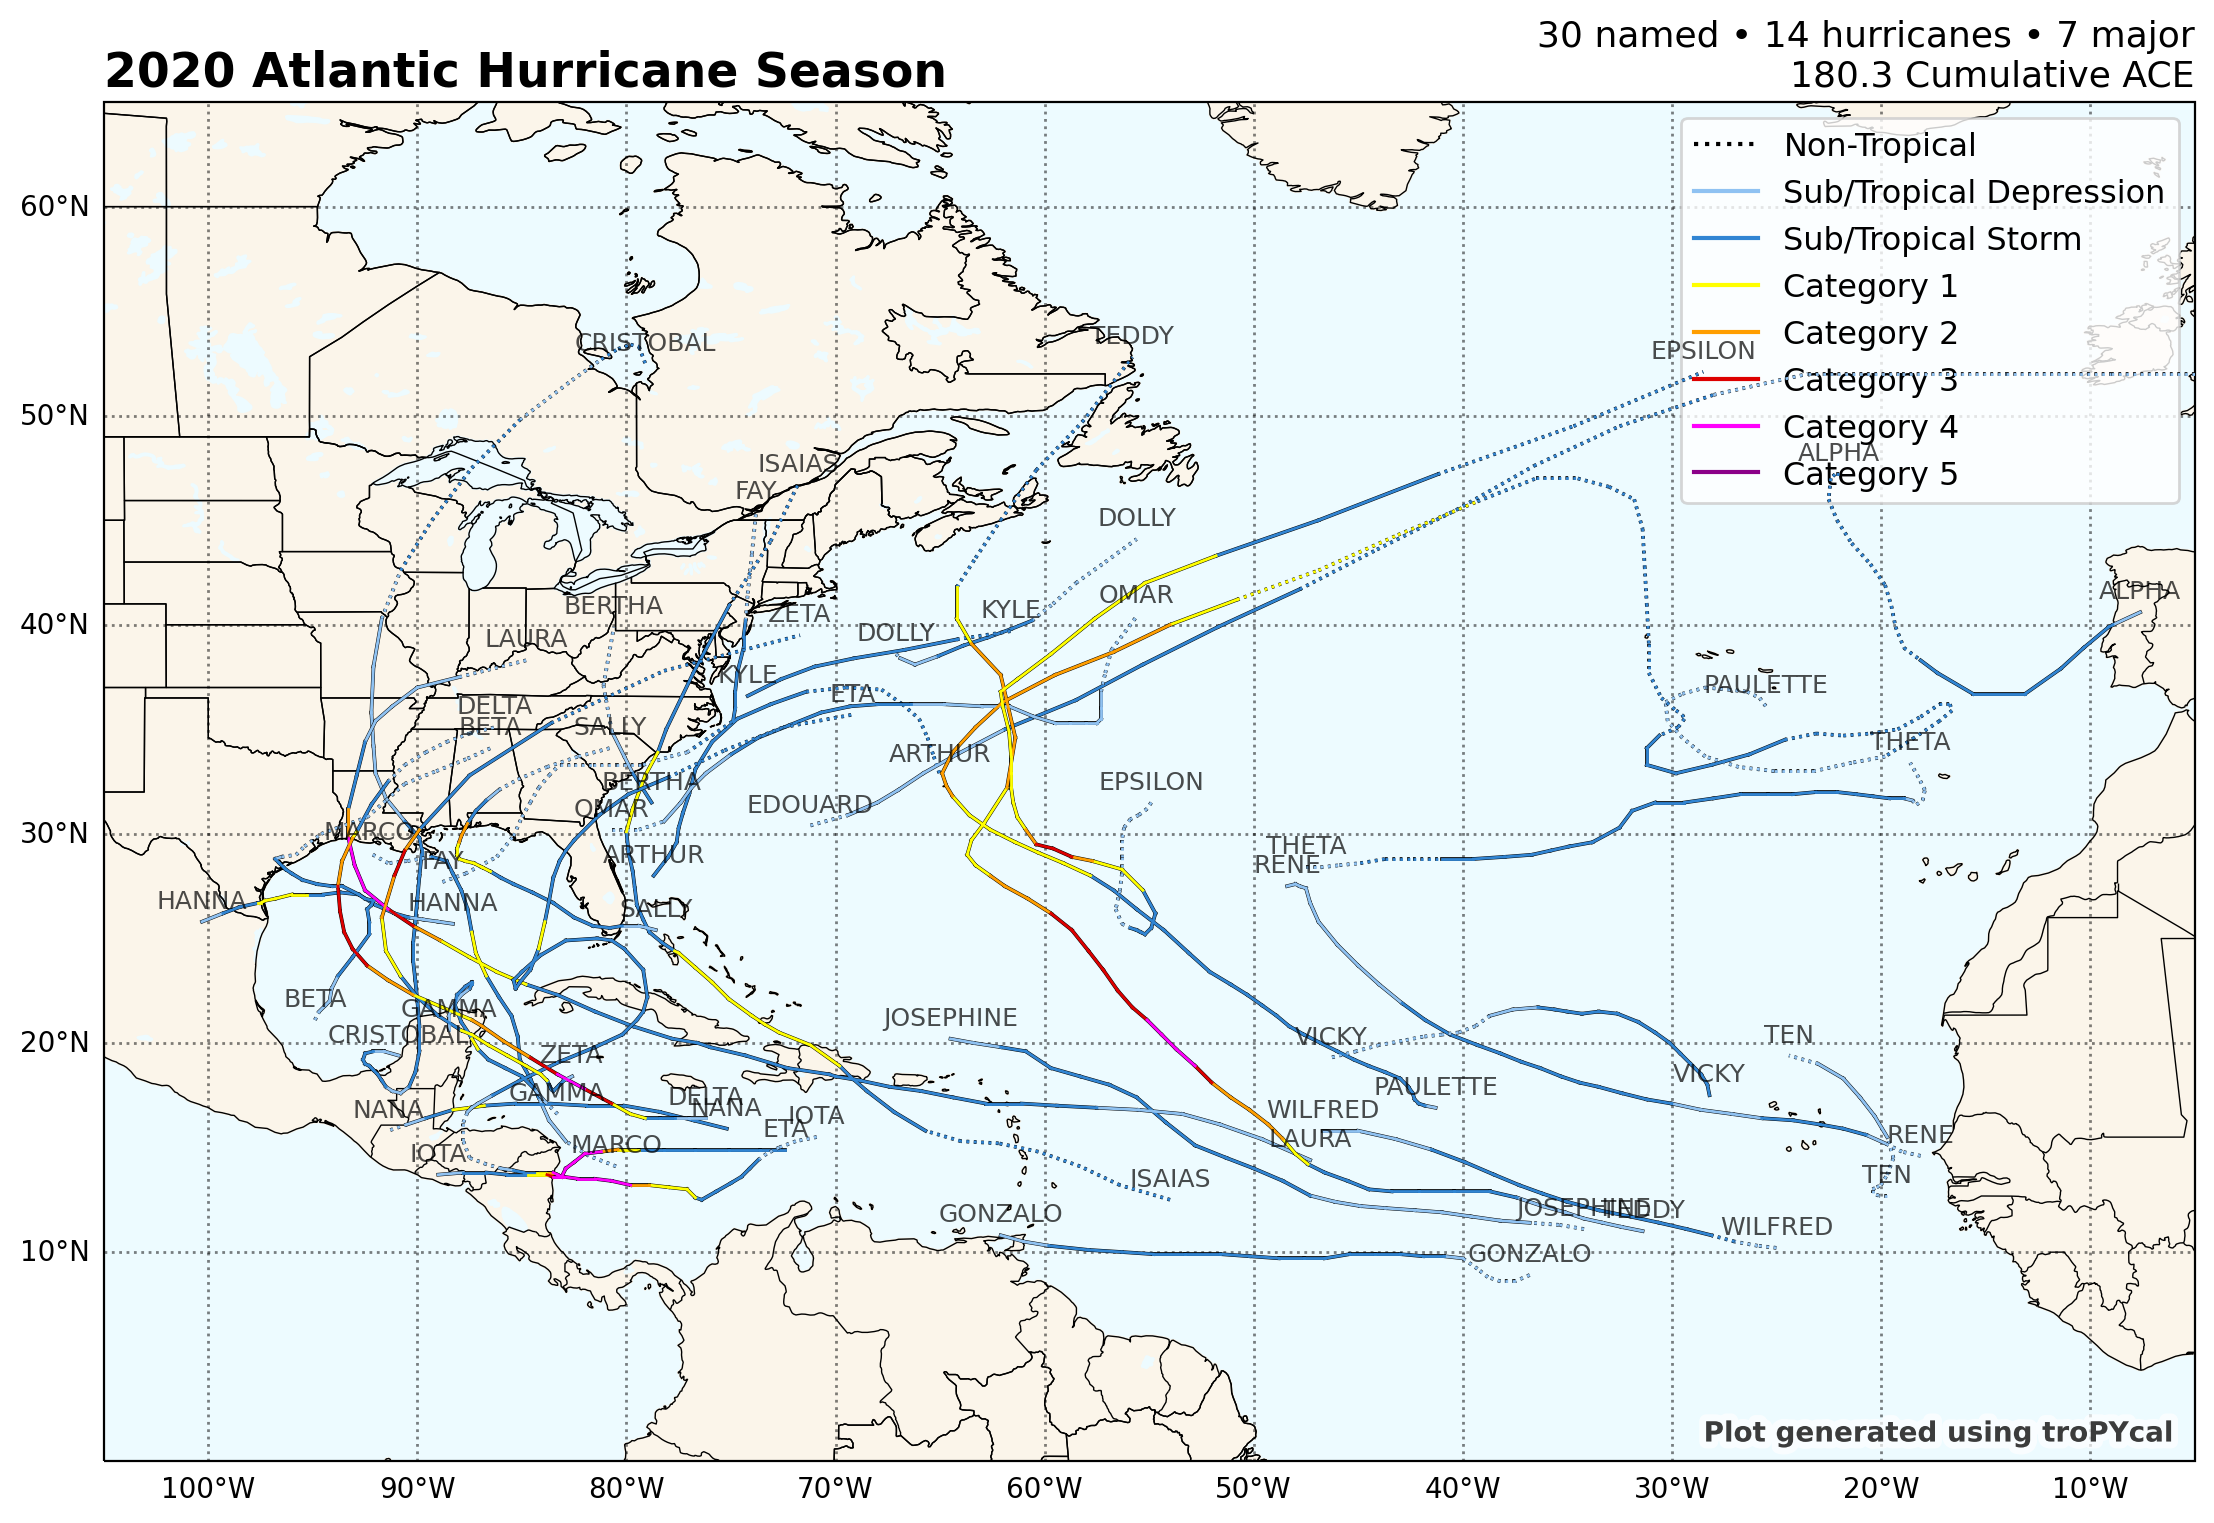

In [14]:
season.plot()

# Storm object

- Our next step is to delve down to analyzing individual storms!


- Let's start with Hurricane Florence from 2018:

In [15]:
storm = basin.get_storm(('Florence',2018))
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      130 knots
    Minimum Pressure:  937 hPa
    Start Date:        1800 UTC 31 August 2018
    End Date:          0600 UTC 17 September 2018

Variables:
    date        (datetime) [2018-08-30 06:00:00 .... 2018-09-18 12:00:00]
    extra_obs   (int64) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [LO .... EX]
    lat         (float64) [12.8 .... 42.2]
    lon         (float64) [-16.9 .... -73.3]
    vmax        (int64) [20 .... 25]
    mslp        (int64) [1008 .... 1006]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL062018
    operational_id:  AL062018
    name:            FLORENCE
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             39.7
    realtime:        False
    invest:          False


# Storm object

- For further data analysis, we can convert this storm to a `Pandas.DataFrame()` object:

In [16]:
storm.to_dataframe()

date  extra_obs special type   lat   lon  vmax  mslp  \
0  2018-08-30 06:00:00          0           LO  12.8 -16.9    20  1008   
1  2018-08-30 12:00:00          0           LO  12.8 -17.9    25  1007   
2  2018-08-30 18:00:00          0           LO  12.8 -19.0    25  1007   
3  2018-08-31 00:00:00          0           LO  13.1 -20.2    30  1006   
4  2018-08-31 06:00:00          0           LO  13.4 -21.4    30  1006   
..                 ...        ...     ...  ...   ...   ...   ...   ...   
74 2018-09-17 12:00:00          0           EX  37.8 -82.0    25  1008   
75 2018-09-17 18:00:00          0           EX  38.8 -82.0    25  1008   
76 2018-09-18 00:00:00          0           EX  39.5 -80.5    25  1008   
77 2018-09-18 06:00:00          0           EX  41.3 -76.8    25  1007   
78 2018-09-18 12:00:00          0           EX  42.2 -73.3    25  1006   

         wmo_basin  
0   north_atlantic  
1   north_atlantic  
2   north_atlantic  
3   north_atlantic  
4   north_atlantic  
..             ...  
74  north_atlantic  
75  north_atlantic  
76  north_atlantic  
77  north_atlantic  
78  north_atlantic  

[79 rows x 9 columns]

# Storm object

- We can also convert this storm to an `xarray.Dataset()` object

In [17]:
print(storm.to_xarray()) #Add .to_netcdf("filename.nc") at the end to save as a netCDF file!

<xarray.Dataset>
Dimensions:    (time: 79)
Coordinates:
  * time       (time) datetime64[ns] 2018-08-30T06:00:00 ... 2018-09-18T12:00:00
Data variables:
    extra_obs  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    special    (time) <U1 '' '' '' '' '' '' '' '' '' ... '' '' '' '' '' '' '' ''
    type       (time) <U2 'LO' 'LO' 'LO' 'LO' 'LO' ... 'EX' 'EX' 'EX' 'EX' 'EX'
    lat        (time) float64 12.8 12.8 12.8 13.1 13.4 ... 38.8 39.5 41.3 42.2
    lon        (time) float64 -16.9 -17.9 -19.0 -20.2 ... -80.5 -76.8 -73.3
    vmax       (time) int64 20 25 25 30 30 30 30 30 ... 30 25 25 25 25 25 25 25
    mslp       (time) int64 1008 1007 1007 1006 1006 ... 1008 1008 1007 1006
    wmo_basin  (time) <U14 'north_atlantic' ... 'north_atlantic'
Attributes:
    id:              AL062018
    operational_id:  AL062018
    name:            FLORENCE
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane Data

# Storm object

- Plotting Florence's track is a simple line of code:

<GeoAxesSubplot:title={'left':'Hurricane FLORENCE','right':'31 Aug 2018 – 17 Sep 2018\n130 kt • 937 hPa • 39.7 ACE'}>

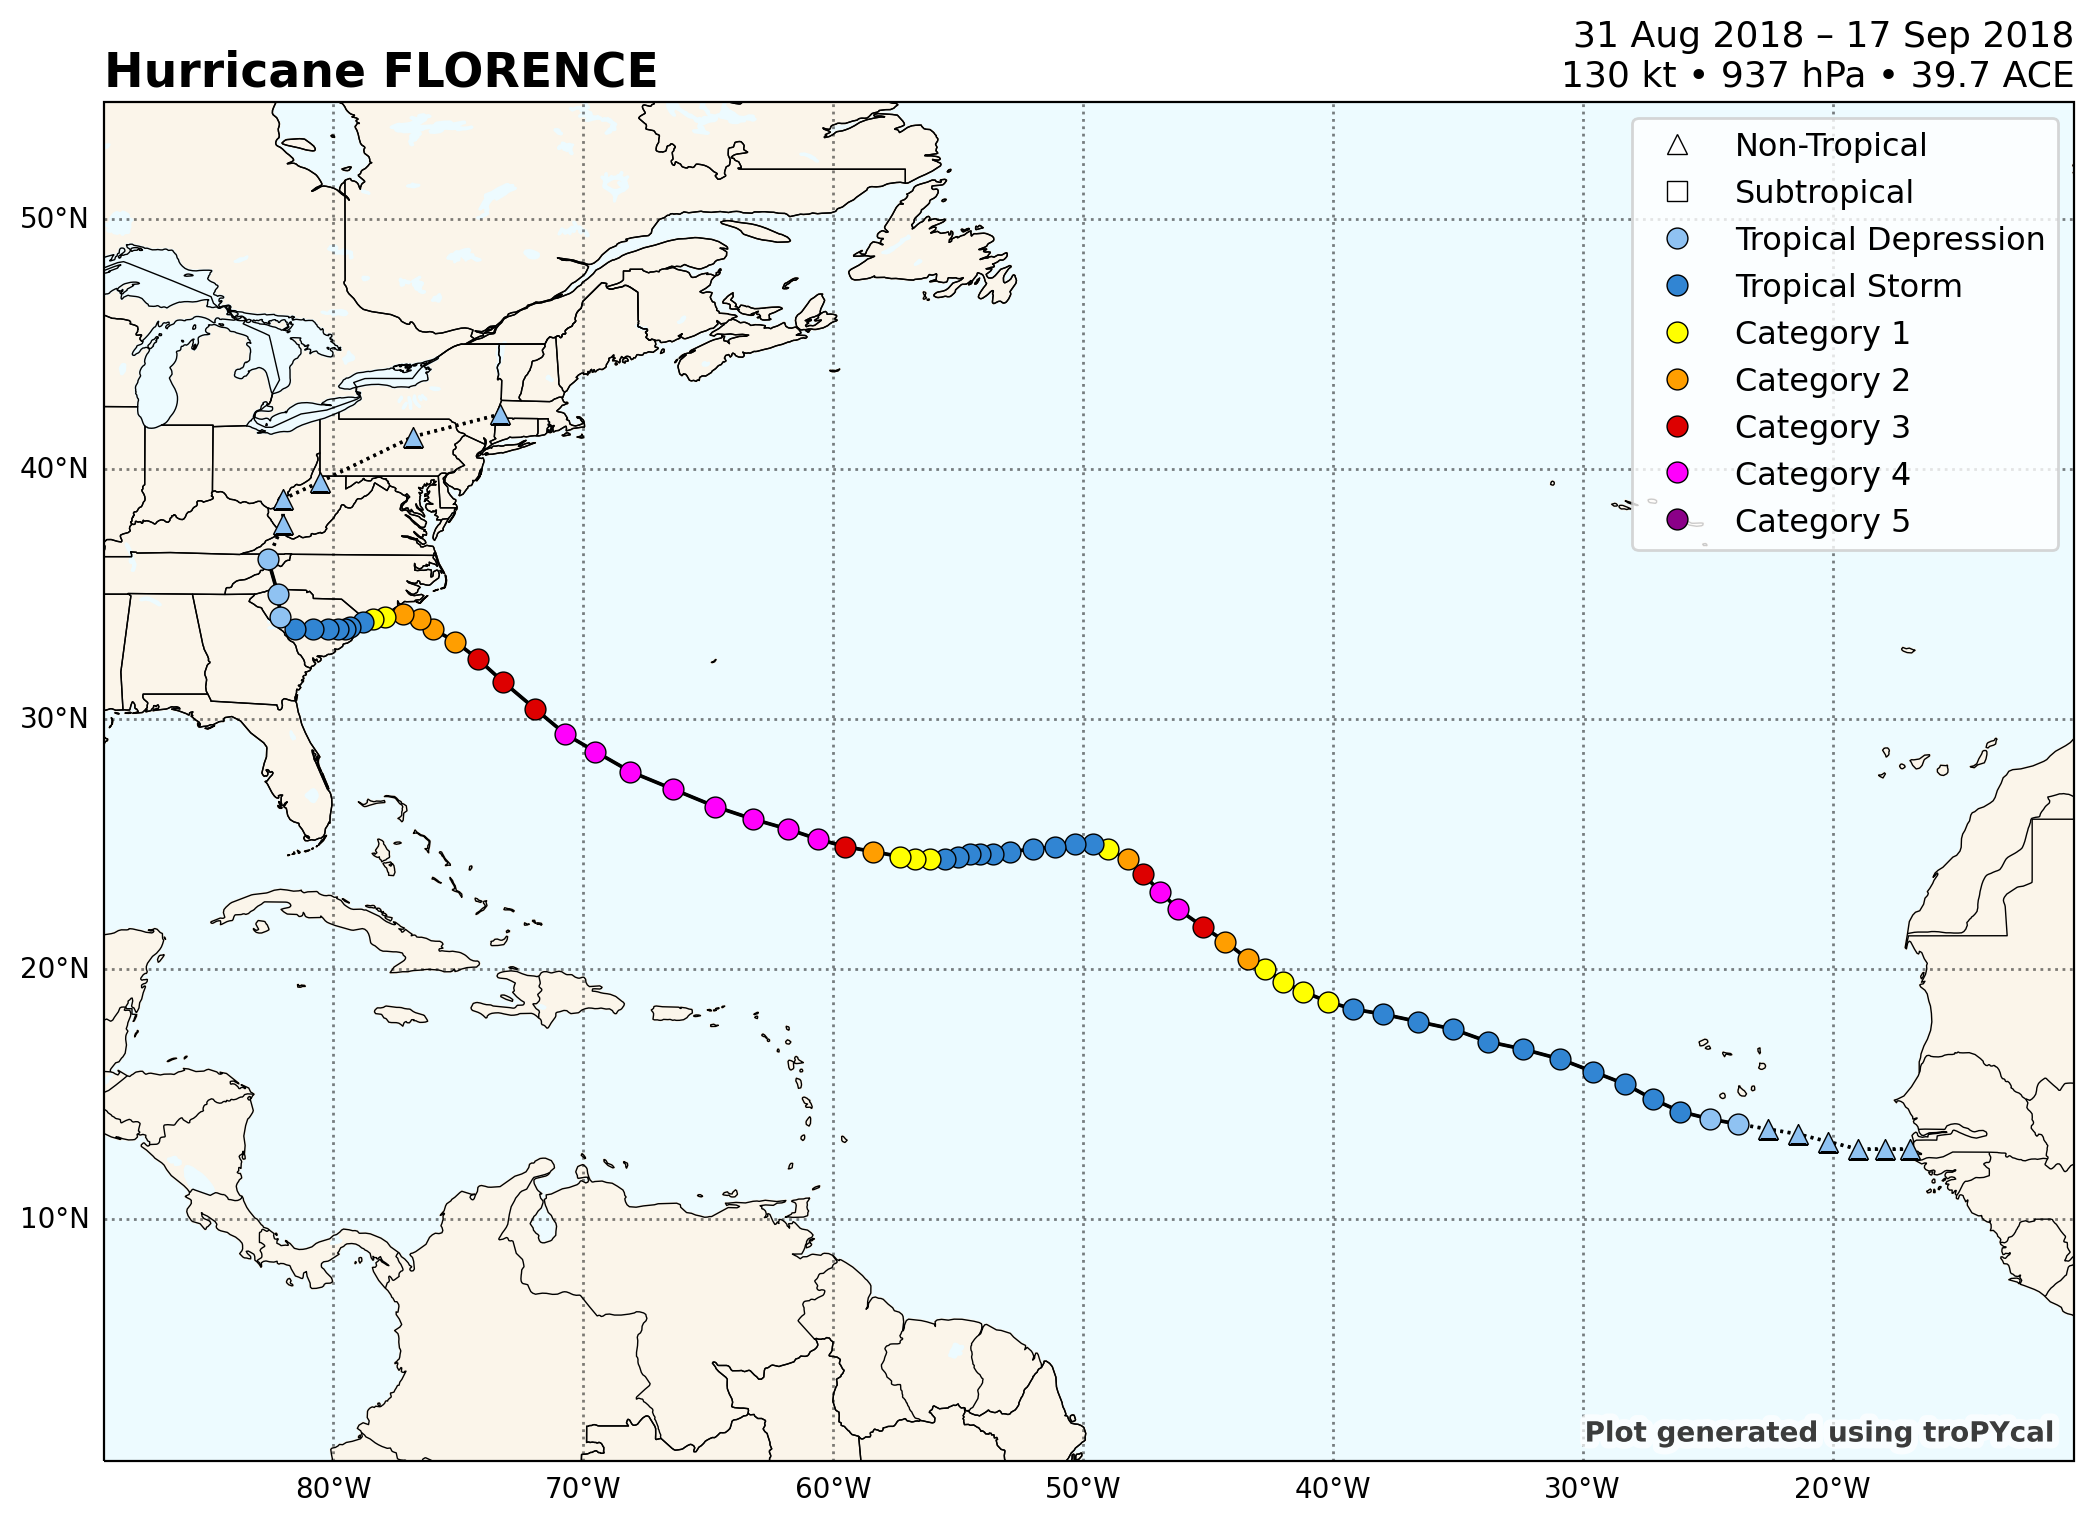

In [18]:
storm.plot()

# Storm object


- Let's delve into the National Hurricane Center (NHC) archives!


- Say we want to plot the official NHC forecast from <span style="color:blue">1200 UTC 7 September 2018</span>:

<GeoAxesSubplot:title={'left':'Tropical Storm FLORENCE','right':'65 mph • 996 hPa • Forecast #33\nForecast Issued: 1500 UTC 07 Sep 2018'}>

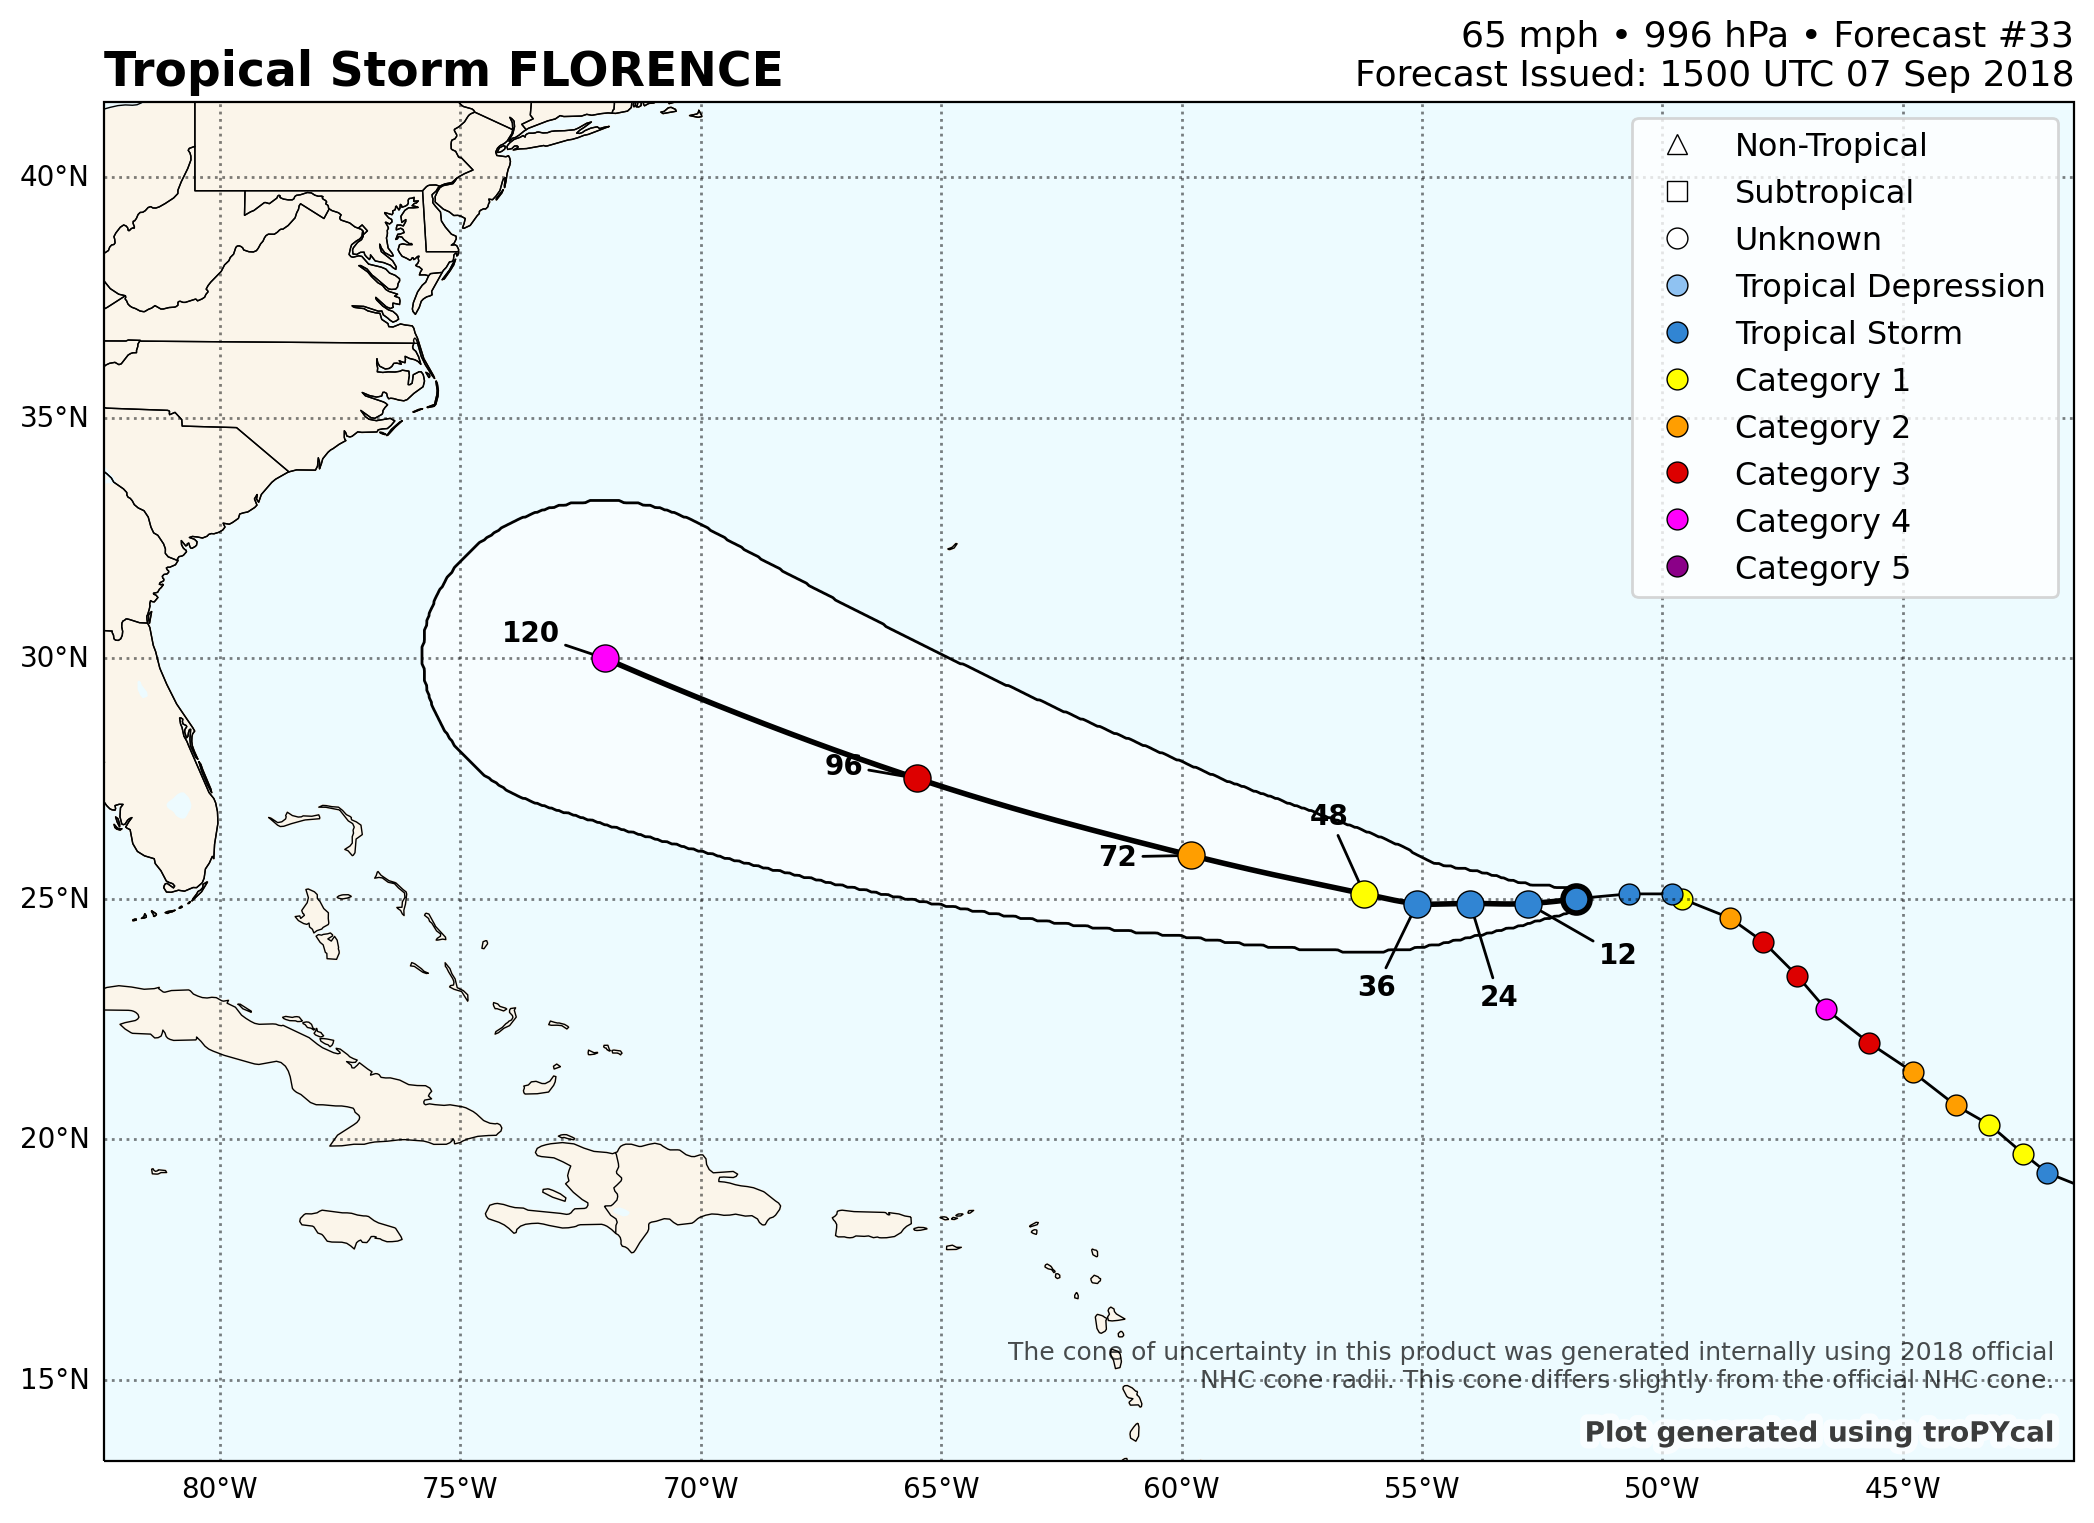

In [19]:
storm.plot_nhc_forecast(dt(2018,9,7,12))

# Storm object

- That's quite a remarkable forecast - quick intensification into a Category 4 hurricane!


- Let's glance at the forecast discussion that accompanied this:

In [20]:
discussion_info = storm.get_nhc_discussion(dt(2018,9,7,12))
print(discussion_info['text'])

ZCZC MIATCDAT1 ALL
TTAA00 KNHC DDHHMM

Tropical Storm Florence Discussion Number  33
NWS National Hurricane Center Miami FL       AL062018
1100 AM AST Fri Sep 07 2018

Moderate to strong southwesterly shear continues to affect Florence,
but visible and microwave satellite images indicate that the
cyclone is maintaining a vigorous, but tilted, circulation.
A mid-level eye feature is noted in both types of satellite
imagery, but the low-level center still appears displaced to the
southwest.  Subjective and objective satellite intensity estimates
have stopped falling--and some have even begun to increase a bit
again--so the initial intensity is being held at 55 kt.

The shear over Florence has likely reached its maximum and is
expected to decrease below 20 kt in 6-12 hours and then decrease to
10 kt or less in 36 hours.  All the while, sea surface temperatures
will be gradually increasing to between 28-29C, and perhaps more
importantly, oceanic heat content values will double in 3-4 days.

# Storm object

- We can further display the GEFS ensemble tracks, along with an ensemble spread ellipse and density plot

<GeoAxesSubplot:title={'left':'GEFS Forecast Tracks for Florence\nTrack Density (200-km radius)','right':'Hour 84 | Valid 0000 UTC 11 September 2018\nInitialized 1200 UTC 07 September 2018'}>

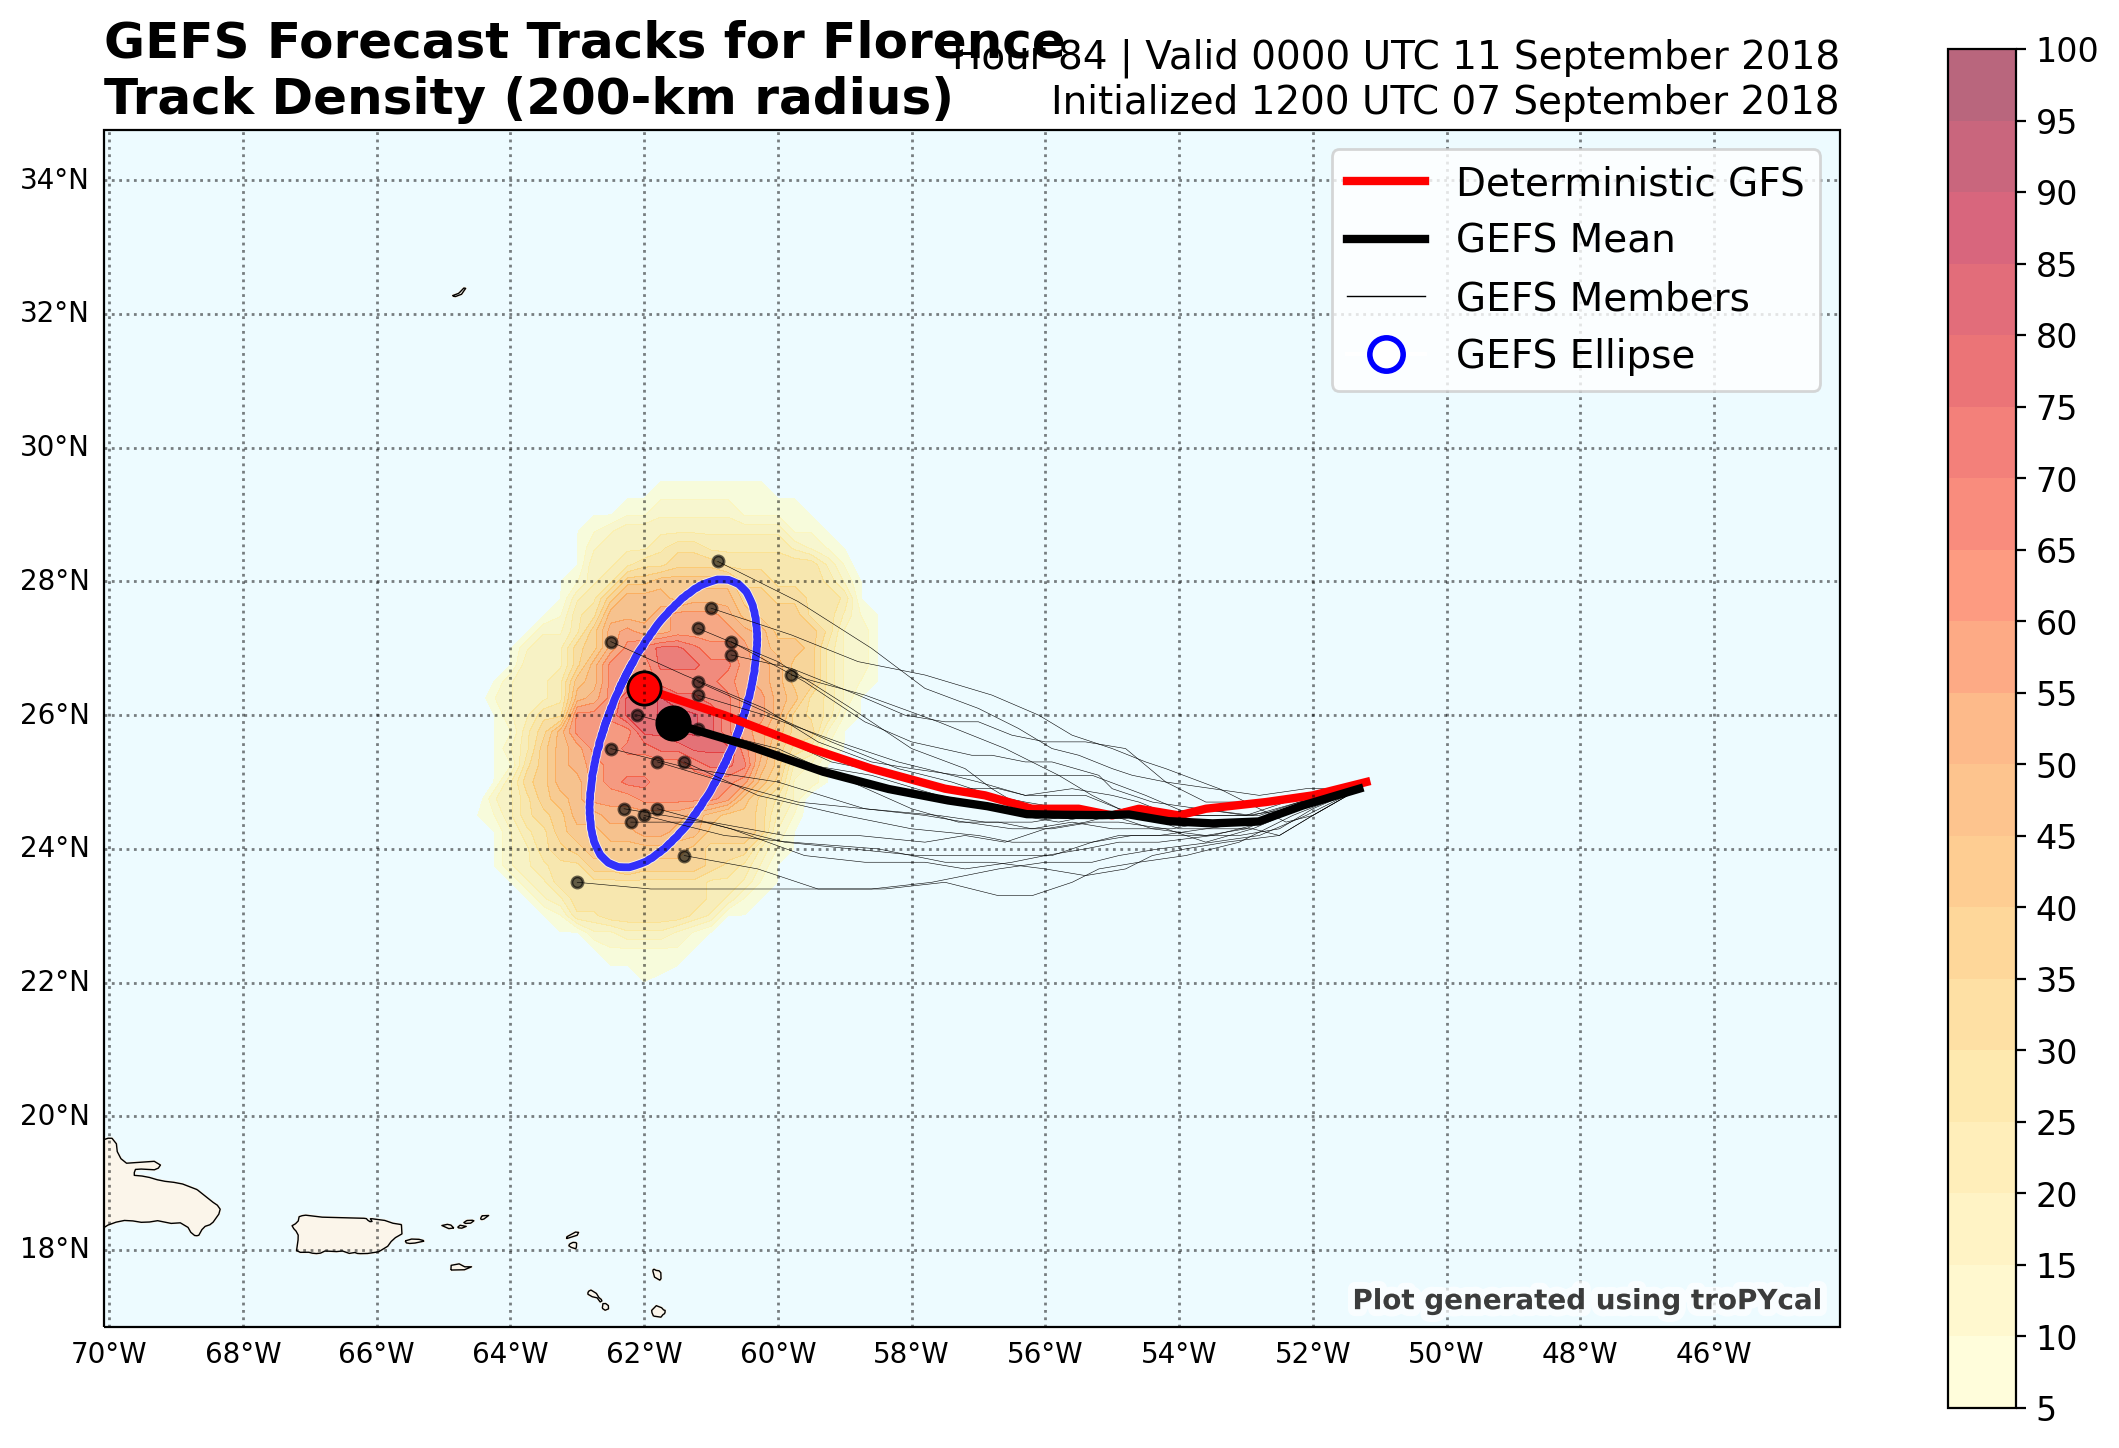

In [21]:
storm.plot_gefs_ensembles(forecast = dt(2018,9,7,12), fhr = [84])

# Storm object

- We can customize the storm plotting function in numerous ways


- One such way is to interpolate storm data to hourly, and plot the 24-hour sustained wind change:

ValueError: 'dvmax_dt' is not a valid value for color

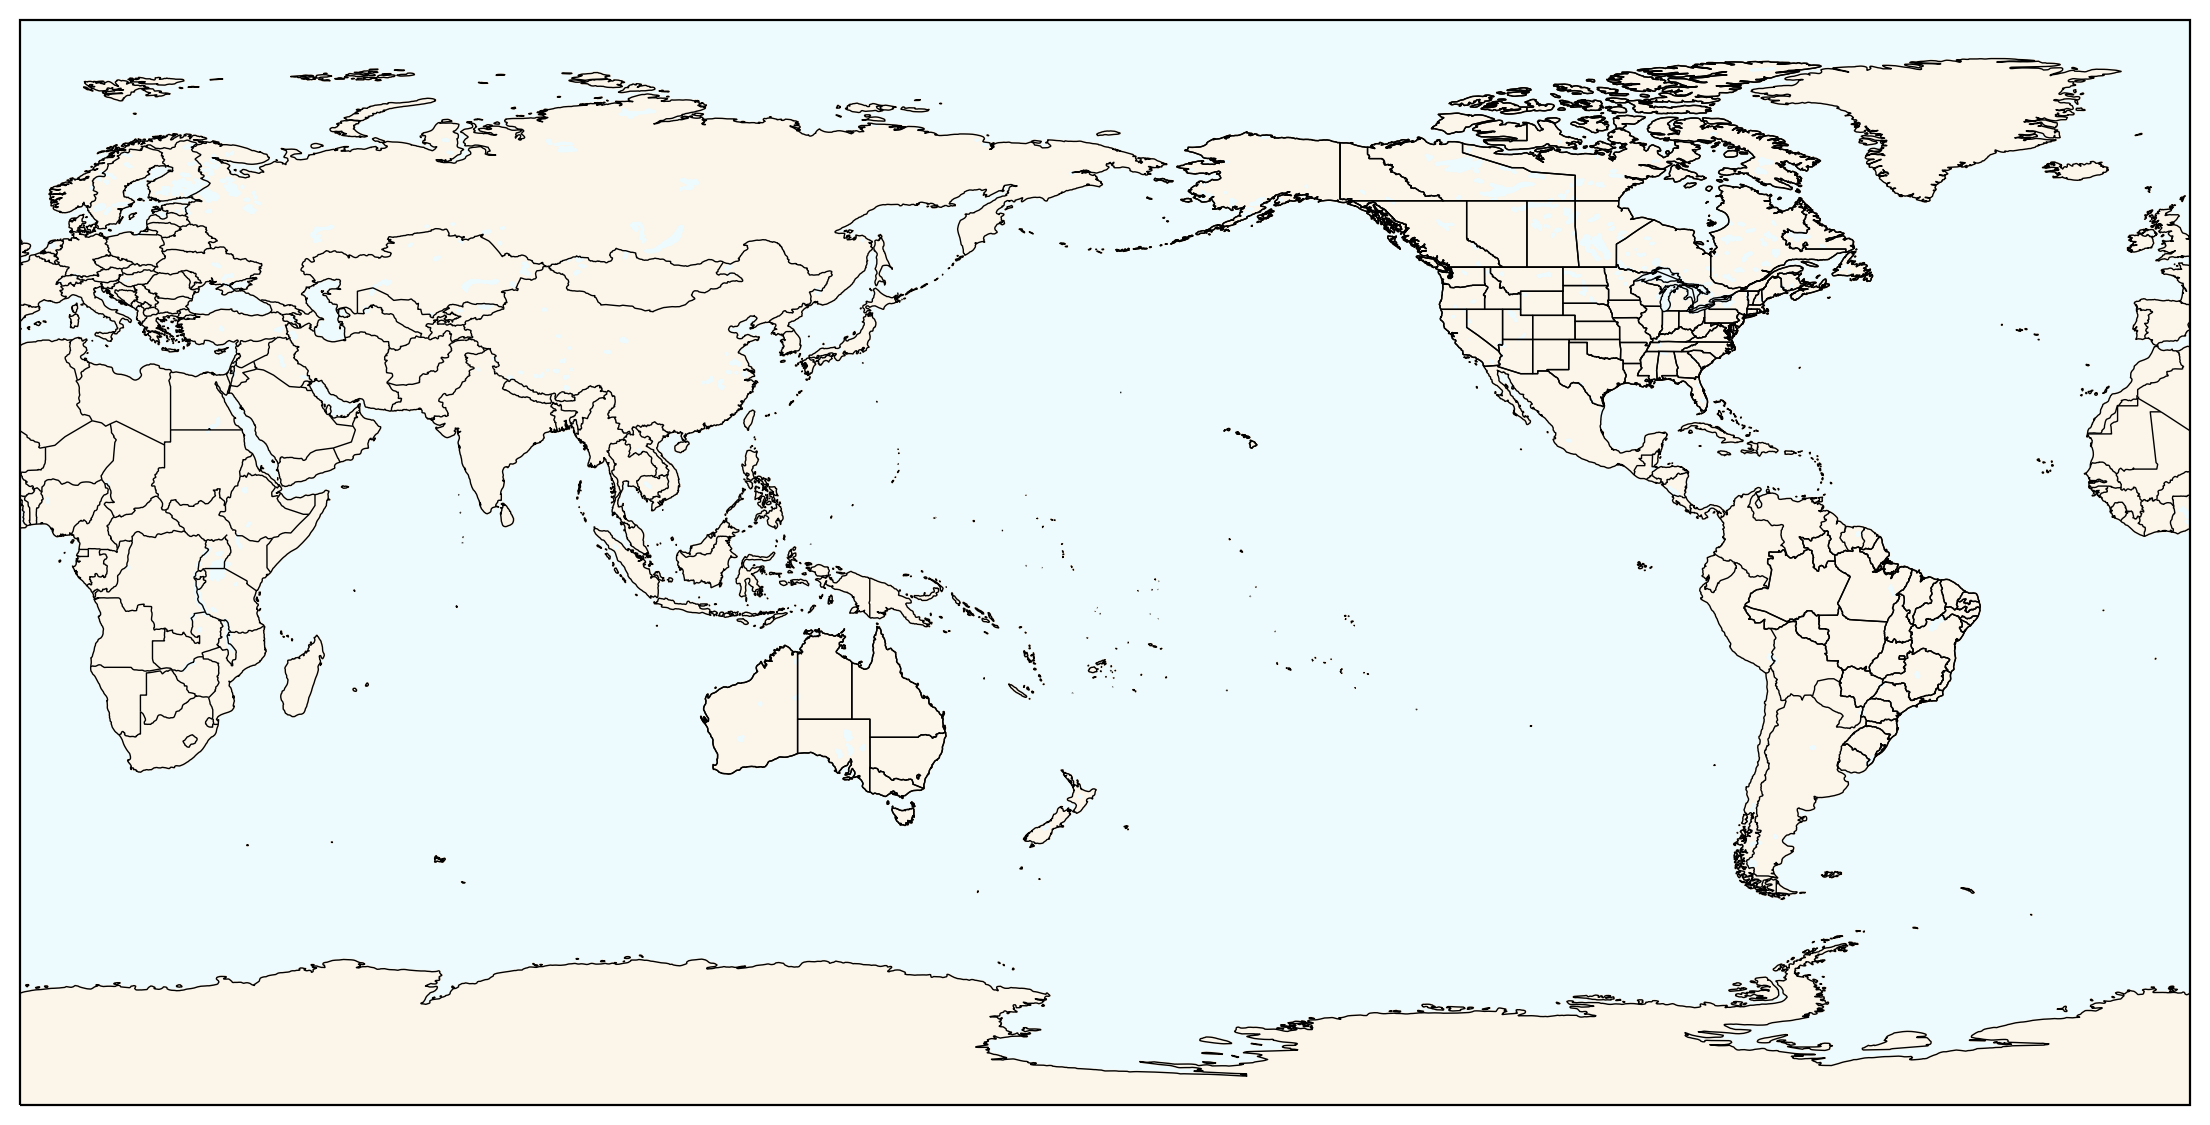

In [22]:
#Create a custom colormap
mycmap = {-60:'violet',-30:'royalblue',-29.99:'dodgerblue',0:'w',29.99:'tomato',30:'firebrick',60:'violet'}

#Interpolate storm to hourly data & plot without dots, colored by 24-hour sustained wind change in knots
storm.interp().plot(prop={'dots':False,'linecolor':'dvmax_dt','cmap':mycmap,'levels':(-61,61),'linewidth':3})

# Storm Aircraft Reconaissance

- A neat application of Storm objects is that we can attach operational reconaissance data to them


- Let's retrieve all of the operational reconaissance data from Hurricane Delta
    - *...this takes a while to run!*

In [23]:
storm = basin.get_storm(('Delta',2020))
storm.get_recon(read_path="delta_recon") #Here we are reading from a saved file to save time

FileNotFoundError: [Errno 2] No such file or directory: 'delta_recon'

In [24]:
mycmap = {0:'w',20:'dodgerblue',60:'gold',100:'firebrick',160:'violet'}
storm.recon.plot_points(varname='pkwnd',prop={'cmap':mycmap,'levels':(0,160)})

AttributeError: 'Storm' object has no attribute 'recon'

# Storm Aircraft Reconaissance

- Tropycal converts recon observations to storm-centered coordinates


- One type of plot we can make is an azimuthally averaged hovmoller of flight level wind:

In [25]:
mycmap = {0:'w',20:'dodgerblue',60:'gold',100:'firebrick',160:'violet'}
storm.recon.plot_hovmoller(prop={'cmap':mycmap,'levels':np.arange(0,161,10)})

AttributeError: 'Storm' object has no attribute 'recon'

In [26]:
mycmap = {0:'w',20:'dodgerblue',60:'gold',100:'firebrick',160:'violet'}
storm.recon.plot_maps(dt(2020,10,6,18),varname=('pkwnd','p_sfc'),
                      prop={'cmap':mycmap,'levels':np.arange(0,161,10)},radlim=150,window=4,align='end')

AttributeError: 'Storm' object has no attribute 'recon'

In [27]:
storm.recon.plot_maps(dt(2020,10,9,6),varname=('pkwnd','p_sfc'),
                      prop={'cmap':mycmap,'levels':np.arange(0,161,10)},radlim=150,window=4,align='end')

AttributeError: 'Storm' object has no attribute 'recon'

# Tornado Data

- Tropycal also has a Tornado utility


- Tornado tracks can be applied to a TrackDataset or Storm object, or as their own object


- To apply tornado tracks to a TrackDataset object, we can assign all tornadoes within a specified distance (km) to a TC


- Once we've done that, we can plot TC motion relative tornado paths

In [29]:
basin.assign_storm_tornadoes(dist_thresh=750)
basin.plot_TCtors_rotated('all')
## I notice the latest available file is 1950-2019, but the except: doesn't seem to work, it fails on try:

--> Starting to read in tornado track data


HTTPError: HTTP Error 404: Not Found

# Tornado Data

- We can also apply tornado data to individual storms


- Hurricane Ivan (2004) notoriously produced many tornadoes across the United States
    - *Let's plot Ivan's associated tornadoes and **Practically Perfect Hindcast (PPH)**:*

In [30]:
storm = basin.get_storm(('Ivan',2004))
storm.plot_tors(plotPPH=True)

--> Starting to read in tornado track data


HTTPError: HTTP Error 404: Not Found

# Tornado Data

- We can also apply the tornado dataset to non-TC applications


- To do so, we create an instance of a TornadoDataset object:

In [ ]:
Tors = tornado.TornadoDataset()

In [ ]:
Tors.plot_tors(dt(2012,4,14), plotPPH=True, domain='dynamic')

In [ ]:
Tors.plot_tors([dt(2011,4,1),dt(2011,4,30)], plotPPH=True, prop={'PPHlevels':(.5,1,1.5,2,3,4,6,9)})

# Conclusions

- Tropycal provides various methods for tropical cyclone analysis and visualization, in the Atlantic and globally


- We aim for this to be useful for both python and non-python users, for both research and operational purposes


- Tropycal is still in development, and user feedback is valuable for adding or enhancing features


- This script and additional examples are available on our GitHub page: https://github.com/tropycal




**Questions? Contact us at:**

- Tomer Burg - tomerburg@gmail.com

- Sam Lillo - splillo@gmail.com